# Q.1 : Red Wine Quality Prediction Project

In [1]:
# 1st step : I import all the important Libaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score , accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

In [2]:
# 2nd step : Importing the given csv file
df = pd.read_csv('Red_Wine_quality_prediction.csv')
print(df.shape)
df

(1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
# 3rd step : Checking all the information related to the dataset
df.info()
# Output : There is no null values are present

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


# Outlire Removing process :

fixed acidity              Axes(0.125,0.53;0.110714x0.35)
volatile acidity        Axes(0.257857,0.53;0.110714x0.35)
citric acid             Axes(0.390714,0.53;0.110714x0.35)
residual sugar          Axes(0.523571,0.53;0.110714x0.35)
chlorides               Axes(0.656429,0.53;0.110714x0.35)
free sulfur dioxide     Axes(0.789286,0.53;0.110714x0.35)
total sulfur dioxide       Axes(0.125,0.11;0.110714x0.35)
density                 Axes(0.257857,0.11;0.110714x0.35)
pH                      Axes(0.390714,0.11;0.110714x0.35)
sulphates               Axes(0.523571,0.11;0.110714x0.35)
alcohol                 Axes(0.656429,0.11;0.110714x0.35)
quality                 Axes(0.789286,0.11;0.110714x0.35)
dtype: object

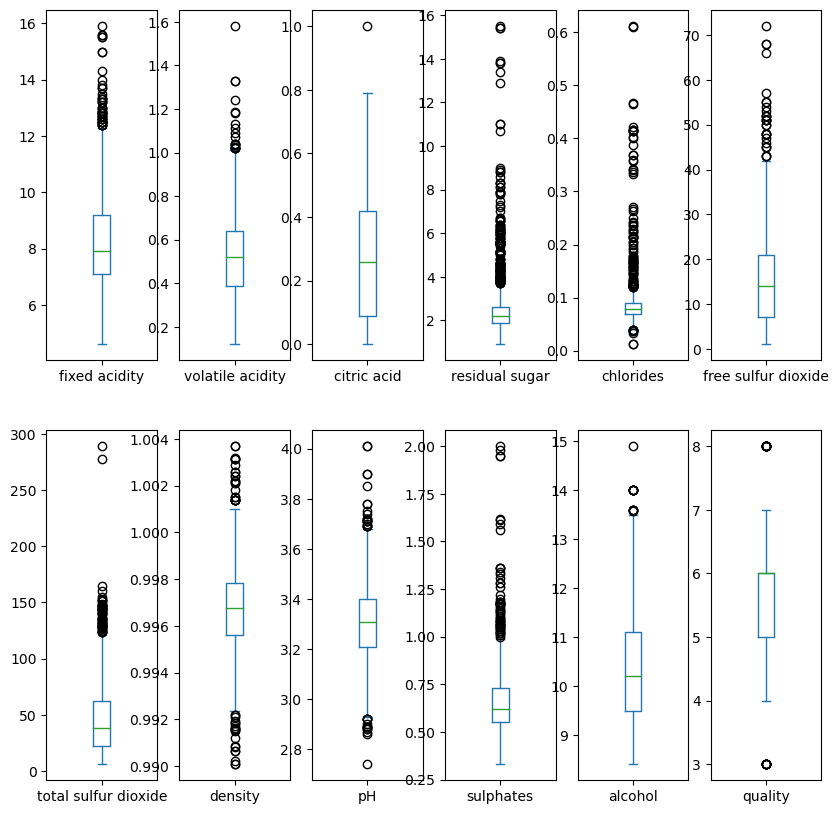

In [4]:
#4th step : Checking the outliers
df.plot(kind = 'box', subplots = True ,layout = (2,6), figsize = (10,10))
#Output : We can see some of the outliers here .

In [5]:
# 5th step : Checking the zscore values :
z = np.abs(zscore(df))
z

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.528360,0.961877,1.391472,0.453218,0.243707,0.466193,0.379133,0.558274,1.288643,0.579207,0.960246,0.787823
1,0.298547,1.967442,1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,0.719933,0.128950,0.584777,0.787823
2,0.298547,1.297065,1.186070,0.169427,0.096353,0.083669,0.229047,0.134264,0.331177,0.048089,0.584777,0.787823
3,1.654856,1.384443,1.484154,0.453218,0.264960,0.107592,0.411500,0.664277,0.979104,0.461180,0.584777,0.450848
4,0.528360,0.961877,1.391472,0.453218,0.243707,0.466193,0.379133,0.558274,1.288643,0.579207,0.960246,0.787823
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,1.217796,0.403229,0.980669,0.382271,0.053845,1.542054,0.075043,0.978765,0.899886,0.461180,0.072294,0.787823
1595,1.390155,0.123905,0.877968,0.240375,0.541259,2.211469,0.137820,0.862162,1.353436,0.601055,0.729364,0.450848
1596,1.160343,0.099554,0.723916,0.169427,0.243707,1.255161,0.196679,0.533554,0.705508,0.542042,0.541630,0.450848
1597,1.390155,0.654620,0.775267,0.382271,0.264960,1.542054,0.075043,0.676657,1.677400,0.305990,0.209308,0.787823


In [6]:
# 6th step : Checking the zscore values that are greater than 3 ( Outliers)
threshold = 3
print(np.where(z>3))
# Putput : There are so many outliers are there

(array([  13,   14,   15,   15,   17,   17,   19,   33,   38,   42,   43,
         45,   57,   81,   81,   83,   86,   88,   91,   92,   95,  106,
        106,  109,  120,  126,  127,  142,  144,  147,  151,  151,  151,
        151,  163,  164,  169,  169,  181,  199,  226,  226,  240,  243,
        244,  258,  258,  274,  281,  291,  324,  325,  339,  340,  347,
        354,  374,  381,  391,  396,  396,  400,  400,  442,  442,  451,
        459,  467,  480,  480,  494,  515,  517,  544,  554,  554,  555,
        555,  557,  557,  568,  584,  588,  591,  595,  608,  614,  636,
        639,  649,  649,  651,  652,  652,  652,  672,  672,  684,  690,
        690,  692,  692,  695,  723,  724,  730,  754,  776,  777,  795,
        821,  832,  836,  837,  889,  899,  911,  917,  923,  925,  926,
        982, 1017, 1018, 1043, 1051, 1051, 1071, 1074, 1079, 1079, 1081,
       1081, 1111, 1114, 1131, 1154, 1165, 1175, 1186, 1231, 1235, 1244,
       1244, 1244, 1260, 1269, 1269, 1270, 1270, 1

In [7]:
# 7th step : Creating a new dataset without outliers 
new_df = df[(z<3).all(axis = 1)]
new_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


# Skewness removing process :

array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>]], dtype=object)

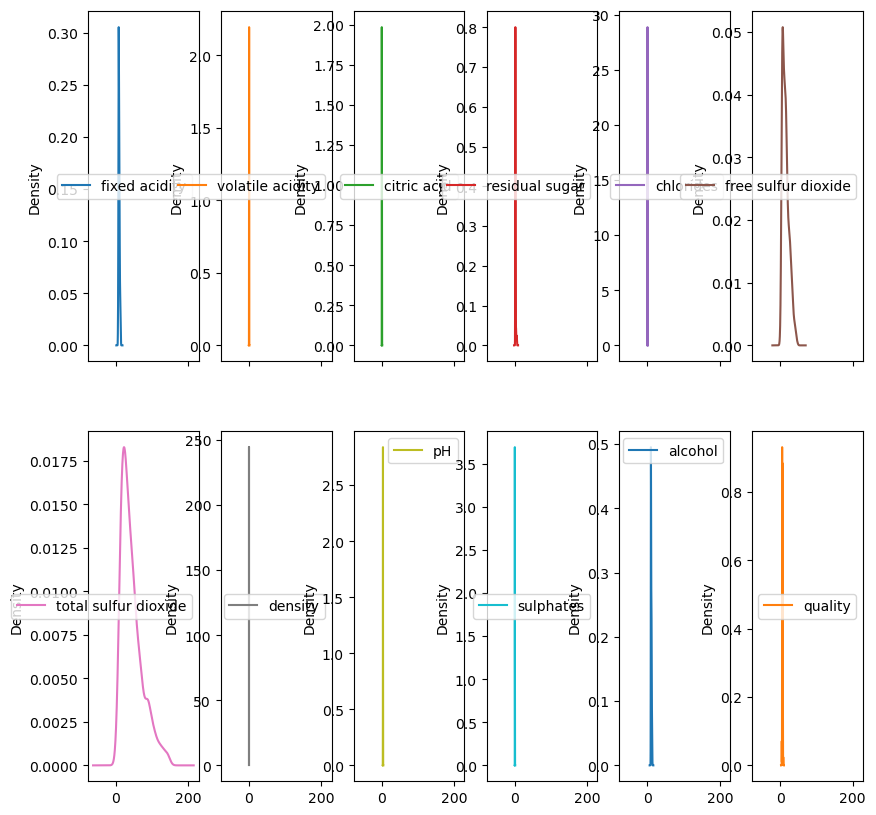

In [8]:
# 8th step : To ckeck the skewness for each column
new_df.plot(kind = 'kde', subplots = True ,layout = (2,6), figsize = (10,10))
#Output : There are only tow columns ('free sulfur dioxide','total sulfur dioxide') which is considerable

In [9]:
# 9th step : Checking the statistics of the dataset :
new_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000
mean,8.310062,0.522950,0.265382,2.387285,0.081425,15.104755,43.735355,0.996710,3.315934,0.642584,10.421089,5.659545
std,1.646458,0.168531,0.190934,0.862078,0.020966,9.309768,29.441284,0.001716,0.141096,0.129801,1.021588,0.781605
min,5.000000,0.120000,0.000000,1.200000,0.038000,1.000000,6.000000,0.991500,2.880000,0.330000,8.500000,4.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,21.000000,0.995600,3.220000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,36.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.630000,0.420000,2.600000,0.089000,21.000000,58.000000,0.997800,3.400000,0.720000,11.100000,6.000000
max,13.500000,1.040000,0.790000,6.700000,0.226000,47.000000,145.000000,1.002200,3.750000,1.160000,13.600000,8.000000


In [10]:
new_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


# Correlation Checking :

In [11]:
# 10th step : Checking the correlation of each column to  the output column :
dfcor = new_df.corr()
dfcor

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.297150,0.698363,0.180293,0.183549,-0.148815,-0.099928,0.659927,-0.705572,0.200371,-0.015114,0.145163
volatile acidity,-0.297150,1.000000,-0.589452,0.025977,0.072709,0.013943,0.110338,-0.004957,0.251343,-0.348126,-0.213213,-0.353443
citric acid,0.698363,-0.589452,1.000000,0.184960,0.100361,-0.074441,0.005301,0.371729,-0.520311,0.302815,0.168766,0.243999
residual sugar,0.180293,0.025977,0.184960,1.000000,0.126735,-0.000844,0.095093,0.344801,-0.075140,0.076129,0.162533,0.061482
chlorides,0.183549,0.072709,0.100361,0.126735,1.000000,-0.058163,0.045025,0.328695,-0.182841,0.022107,-0.205414,-0.108787
free sulfur dioxide,-0.148815,0.013943,-0.074441,-0.000844,-0.058163,1.000000,0.660188,-0.037630,0.108831,0.055956,-0.077993,-0.071202
total sulfur dioxide,-0.099928,0.110338,0.005301,0.095093,0.045025,0.660188,1.000000,0.118965,-0.005940,-0.039024,-0.259952,-0.237745
density,0.659927,-0.004957,0.371729,0.344801,0.328695,-0.037630,0.118965,1.000000,-0.312310,0.129896,-0.468312,-0.167568
pH,-0.705572,0.251343,-0.520311,-0.075140,-0.182841,0.108831,-0.005940,-0.312310,1.000000,-0.039082,0.135624,-0.082164
sulphates,0.200371,-0.348126,0.302815,0.076129,0.022107,0.055956,-0.039024,0.129896,-0.039082,1.000000,0.241636,0.386567


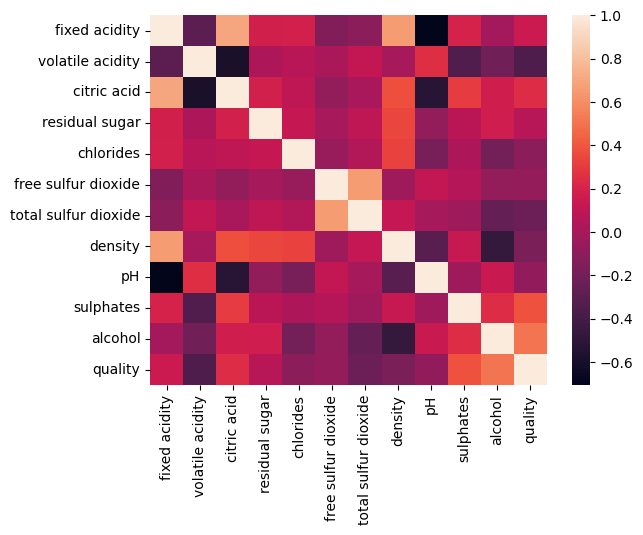

In [12]:
sns.heatmap(dfcor)
plt.show()

In [13]:
# So seeing all this things I can conclude that the columns 'chlorides' and 'density' are not very important here in this dataset to predict the accuracy
# 11th step : Delete unnecessery columns :
corrected_df = new_df.drop(columns=['chlorides', 'density'])
corrected_df

,fixed acidity,volatile acidity,citric acid,residual sugar,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,11.0,34.0,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,25.0,67.0,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,15.0,54.0,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,17.0,60.0,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,11.0,34.0,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,32.0,44.0,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,39.0,51.0,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,29.0,40.0,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,32.0,44.0,3.57,0.71,10.2,5


In [14]:
X = corrected_df.iloc[:,0:-1]
y = corrected_df.iloc[:,-1]

In [15]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size = 0.30 , random_state = 42)

# Testing with different Classification models :

# 1. Using Logistic Regression :

In [56]:
from sklearn.linear_model import LogisticRegression

In [17]:
lr =LogisticRegression()

In [18]:
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'solver': ['lbfgs','newton-cg','sag'],
}

grid_search = GridSearchCV(lr, param_grid, cv=5)
grid_search.fit(X_train, y_train)

y_pred_lr = grid_search.best_estimator_.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_lr)
print("Accuracy score of Logistic Regression :", accuracy)
print('best parameters :',grid_search.best_params_)

Accuracy score of Logistic Regression : 0.5504587155963303
best parameters : {'penalty': 'l2', 'solver': 'lbfgs'}


In [19]:
print('cross validation score of Logistic Regression :',np.mean(cross_val_score(grid_search,X,y,cv  = 10 , scoring = 'accuracy')))

cross validation score of Logistic Regression : 0.6038025507794049


# 2. Using Support Vactor Machine :

In [20]:
from sklearn.svm import SVC

In [21]:
svc = SVC()
svc.fit(X_train , y_train)
y_pred_svc = svc.predict(X_test)
print('accuracy score of Support Vactor Classification :', accuracy_score( y_test , y_pred_svc))

accuracy score of Support Vactor Classification : 0.49770642201834864


In [27]:
print('cross validation score of Support Vactor Classification :',np.mean(cross_val_score(svc,X,y,cv  = 10 , scoring = 'accuracy')))

cross validation score of Support Vactor Classification : 0.5072319319792159


# 3. Using KNeighbors Classifier

In [22]:
from sklearn.neighbors import KNeighborsClassifier

In [23]:
knn = KNeighborsClassifier()
param_grid = {
    'n_neighbors': [3,5,7,10,15 , 20 , 25 , 30],
    'weights': ['uniform','distance'],
}

grid_search_knn = GridSearchCV(knn, param_grid, cv=5)
grid_search_knn.fit(X_train, y_train)

y_pred_knn = grid_search_knn.best_estimator_.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_knn)
print("Accuracy score of KNeighborsClassifier :", accuracy)
print('best parameters :',grid_search_knn.best_params_)

Accuracy score of KNeighborsClassifier : 0.5802752293577982
best parameters : {'n_neighbors': 20, 'weights': 'distance'}


In [30]:
print('cross validation score of KNeighborsClassifier :',np.mean(cross_val_score(grid_search_knn,X,y,cv  = 10 , scoring = 'accuracy')))

cross validation score of KNeighborsClassifier : 0.5086395843174303


# 4. Using Naive Bayes classifier :

In [24]:
from sklearn.naive_bayes import MultinomialNB

In [25]:
mnb = MultinomialNB()
mnb.fit(X_train , y_train)
y_pred_mnb = mnb.predict(X_test)
print("Accuracy score of KNeighborsClassifier :", accuracy_score(y_test ,y_pred_mnb))

Accuracy score of KNeighborsClassifier : 0.4334862385321101


In [26]:
print('cross validation score of KNeighborsClassifier :',np.mean(cross_val_score(mnb,X,y,cv  = 10 , scoring = 'accuracy')))

cross validation score of KNeighborsClassifier : 0.43969768540387333


# 5. Using Decision Tree Classifier :

In [27]:
from sklearn.tree import DecisionTreeClassifier

In [28]:
dtc = DecisionTreeClassifier()
param_grid = {
    'criterion': ['gini','entropy'],
    'max_depth': [3,4,5,6,7],
    'min_samples_split': [2,3,4,5,6],
    'min_samples_leaf':[1,2,3,4],
    
}

grid_search_dtc = GridSearchCV(dtc, param_grid, cv=5)
grid_search_dtc.fit(X_train, y_train)

y_pred_dtc = grid_search_dtc.best_estimator_.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_dtc)
print("Accuracy score of Decision Tree Classifier :", accuracy)
print('best parameters :',grid_search_dtc.best_params_)

Accuracy score of Decision Tree Classifier : 0.6077981651376146
best parameters : {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 4}


# 6. Using Random Forest Classifier :

In [30]:
from sklearn.ensemble import RandomForestClassifier

In [37]:
rfc = RandomForestClassifier(n_estimators = 500 , criterion = 'gini' ,max_depth = 5 , max_leaf_nodes = 16 )
rfc.fit(X_train , y_train)
y_pred_rfc = rfc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_rfc)
print("Accuracy score of Random Forest Classifier :", accuracy)

Accuracy score of Random Forest Classifier : 0.6032110091743119


In [38]:
for score,name in zip(rfc.feature_importances_ , X_train.columns):
    print(round(score,2),name)

0.05 fixed acidity
0.12 volatile acidity
0.07 citric acid
0.04 residual sugar
0.04 free sulfur dioxide
0.14 total sulfur dioxide
0.03 pH
0.16 sulphates
0.36 alcohol


In [ ]:
# Yet PH is not that important

# 7. Using Gradiant Boosting Classifier :

In [39]:
from sklearn.ensemble import GradientBoostingClassifier

In [47]:
gbc = GradientBoostingClassifier(learning_rate = 0.1 ,n_estimators = 500 , criterion = 'friedman_mse' , min_samples_leaf = 1 , min_samples_split = 2 )
gbc.fit(X_train , y_train)
y_pred_gbc = gbc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_gbc)
print("Accuracy score of Gradient Boosting Classifier :", accuracy)

Accuracy score of Gradient Boosting Classifier : 0.658256880733945


# 8. Using XGBoost :

In [41]:
import xgboost as xgb
dtrain = xgb.DMatrix( X_train, label= y_train)
params = {
    'eta': 0.1,
    'max_depth': 6,
    'subsample': 0.8,
    'colsample_bytree': 0.7,
    'silent': 1
}

# Train the model
model = xgb.train(params,dtrain , num_boost_round=100)

In [42]:
y_pred_gb = model.predict(xgb.DMatrix( X_test, label= y_test))
accuracy_score(y_test , y_pred_gb.round())

0.6467889908256881

# 9. Using Voting Classifier :

In [50]:
from sklearn.ensemble import VotingClassifier

In [51]:
voting_clf = VotingClassifier(
   estimators = [
       ('dtc', DecisionTreeClassifier(criterion = 'gini', max_depth = 5, min_samples_leaf = 4, min_samples_split = 4)),
       ('rfc',RandomForestClassifier(n_estimators = 500 , criterion = 'gini' ,max_depth = 5 , max_leaf_nodes = 16 )),
       ('gbc',GradientBoostingClassifier(learning_rate = 0.1 ,n_estimators = 500 , criterion = 'friedman_mse' , min_samples_leaf = 1 , min_samples_split = 2 ))
   ])
voting_clf.fit(X_train , y_train)
voting_pred = voting_clf.predict(X_test)
accuracy = accuracy_score(y_test, voting_pred)
print("Accuracy score of Voting Classifier :", accuracy)


Accuracy score of Voting Classifier : 0.6238532110091743


# 10 . Using Stacking Classifier :

In [52]:
from sklearn.ensemble import StackingClassifier

In [61]:
stacking_clf = StackingClassifier(
   estimators = [
       ('lr', LogisticRegression()),
       ('knn',KNeighborsClassifier(n_neighbors = 20, weights = 'distance')),
       ('dtc', DecisionTreeClassifier(criterion = 'gini', max_depth = 5, min_samples_leaf = 4, min_samples_split = 4)),
       ('rfc',RandomForestClassifier(n_estimators = 500 , criterion = 'gini' ,max_depth = 5 , max_leaf_nodes = 16 )),
       ('gbc',GradientBoostingClassifier(learning_rate = 0.1 ,n_estimators = 500 , criterion = 'friedman_mse' , min_samples_leaf = 1 , min_samples_split = 2 ))
   ],
   final_estimator = RandomForestClassifier(n_estimators = 500 , criterion = 'gini' ,max_depth = 5 , max_leaf_nodes = 16 ),
   cv = 5
)

  

In [62]:
stacking_clf.fit(X_train , y_train)
stacking_pred = stacking_clf.predict(X_test)
accuracy = accuracy_score(y_test, stacking_pred)
print("Accuracy score of Stacking Classifier :", accuracy)

Accuracy score of Stacking Classifier : 0.6697247706422018


In [65]:
stacking_clf_gbc = StackingClassifier(
   estimators = [
       ('lr', LogisticRegression()),
       ('knn',KNeighborsClassifier(n_neighbors = 20, weights = 'distance')),
       ('dtc', DecisionTreeClassifier(criterion = 'gini', max_depth = 5, min_samples_leaf = 4, min_samples_split = 4)),
       ('rfc',RandomForestClassifier(n_estimators = 500 , criterion = 'gini' ,max_depth = 5 , max_leaf_nodes = 16 )),
       ('gbc',GradientBoostingClassifier(learning_rate = 0.1 ,n_estimators = 500 , criterion = 'friedman_mse' , min_samples_leaf = 1 , min_samples_split = 2 ))
   ],
   final_estimator = GradientBoostingClassifier(learning_rate = 0.1 ,n_estimators = 500 , criterion = 'friedman_mse' , min_samples_leaf = 1 , min_samples_split = 2 ),
   cv = 5
)


In [66]:
stacking_clf_gbc.fit(X_train , y_train)
stacking_pred_gbc = stacking_clf_gbc.predict(X_test)
accuracy = accuracy_score(y_test, stacking_pred_gbc)
print("Accuracy score of Stacking gbc Classifier :", accuracy)

Accuracy score of Stacking gbc Classifier : 0.6330275229357798


In [ ]:
# So , Here I can say that stacking_clf is giving me the best values :

# Make a Prediction Function :

In [80]:
def Red_Wine_Quality_Prediction(p):
    p = p.reshape(1,-1)
    pred = stacking_clf.predict(p)
    print('Quality of red wine :',pred)
    if pred >= 7 :
        print('Good !')
    else :
        print('Not Good !')
        

In [81]:
p = np.array([8.9,	0.350,	0.40,	3.6,	12.0,	24.0,	3.23,	0.70,	12.0])
Red_Wine_Quality_Prediction(p)

Quality of red wine : [7]
Good !


In [ ]:
def Redwine_quality_prediction():

  fixed_acidity = float(input("Enter the Fixed acidity: "))
  volatile_acidity = float(input("Enter Volatile acidity : "))
  citric_acid = float(input("Enter Citric acid : "))
  residual_sugar = float(input("Enter the Residual sugar: "))
  free_sulfur_dioxide = float(input("Enter free sulfur dioxide : "))
  total_sulfur_dioxide = float(input("Enter total sulfur dioxide : "))
  pH = float(input("Enter pH : "))
  sulphates = float(input("Enter Sulphates : "))
  alcohol = float(input("Enter Alcohol : "))


  return np.array([fixed_acidity, volatile_acidity, citric_acid, residual_sugar, free_sulfur_dioxide, total_sulfur_dioxide , pH, sulphates ,alcohol ])

def Red_Wine_Quality_Prediction(p):
    p = p.reshape(1,-1)
    pred = stacking_clf.predict(p)
    print('Quality of red wine :',pred)
    if pred >= 7 :
        print('Good !')
    else :
        print('Not Good !')
         
if __name__ == "__main__":
  try:
    user_data = Redwine_quality_prediction()
    Red_Wine_Quality_Prediction(user_data)
  except ValueError as e:
    print("Error:", e)